In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import patsy

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics

%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('Disney_Wait_final.csv')

In [3]:
df

,Date,datetime,Wait_Time,Temp_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Wind_Gust_(mph),Pressure_(in),Precip_(in),...,Hour_23,Month_5,Month_6,Month_7,Month_8,Month_9,HOLIDAYPX,WDW_TICKET_SEASON_peak,WDW_TICKET_SEASON_regular,WDW_TICKET_SEASON_value
0,2018-05-01,2018-05-01 09:07:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
1,2018-05-01,2018-05-01 09:14:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
2,2018-05-01,2018-05-01 09:21:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
3,2018-05-01,2018-05-01 09:27:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
4,2018-05-01,2018-05-01 09:35:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18352,2018-08-31,2018-08-31 23:35:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18353,2018-08-31,2018-08-31 23:42:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18354,2018-08-31,2018-08-31 23:49:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18355,2018-08-31,2018-08-31 23:56:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18357 entries, 0 to 18356
Data columns (total 47 columns):
Date                         18357 non-null object
datetime                     18357 non-null object
Wait_Time                    18357 non-null float64
Temp_(F)                     18307 non-null float64
Dew_Point_(F)                18307 non-null float64
Humidity_(%)                 18307 non-null float64
Wind_Speed_(mph)             18307 non-null float64
Wind_Gust_(mph)              18307 non-null float64
Pressure_(in)                18307 non-null float64
Precip_(in)                  18307 non-null float64
Day_of_the_Week_Friday       18357 non-null int64
Day_of_the_Week_Monday       18357 non-null int64
Day_of_the_Week_Saturday     18357 non-null int64
Day_of_the_Week_Sunday       18357 non-null int64
Day_of_the_Week_Thursday     18357 non-null int64
Day_of_the_Week_Tuesday      18357 non-null int64
Day_of_the_Week_Wednesday    18357 non-null int64
Hour_0                 

In [5]:
df.columns

Index(['Date', 'datetime', 'Wait_Time', 'Temp_(F)', 'Dew_Point_(F)',
       'Humidity_(%)', 'Wind_Speed_(mph)', 'Wind_Gust_(mph)', 'Pressure_(in)',
       'Precip_(in)', 'Day_of_the_Week_Friday', 'Day_of_the_Week_Monday',
       'Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
       'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
       'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'HOLIDAYPX',
       'WDW_TICKET_SEASON_peak', 'WDW_TICKET_SEASON_regular',
       'WDW_TICKET_SEASON_value'],
      dtype='object')

In [6]:
smaller_df=df.loc[0:18355,['Wait_Time','Temp_(F)','Dew_Point_(F)','Humidity_(%)','Wind_Speed_(mph)',
                           'Wind_Gust_(mph)','Pressure_(in)','Precip_(in)','Day_of_the_Week_Friday', 
                           'Day_of_the_Week_Monday','Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
                           'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
                           'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
                           'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
                           'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
                           'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
                           'Month_6', 'Month_7', 'Month_8']]

In [7]:
smaller_df=smaller_df.loc[smaller_df['Wait_Time']<=145,:]

In [8]:
smaller_df.dropna(inplace=True)

In [9]:
smaller_df.describe()

,Wait_Time,Temp_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Wind_Gust_(mph),Pressure_(in),Precip_(in),Day_of_the_Week_Friday,Day_of_the_Week_Monday,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Month_5,Month_6,Month_7,Month_8
count,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,...,18289.000000,18289.00000,18289.000000,18289.000000,18289.00000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000
mean,56.753404,81.713544,72.263437,74.733556,8.383017,2.456777,29.904424,0.024058,0.141178,0.139045,...,0.073377,0.07726,0.066652,0.068456,0.04150,0.011154,0.239652,0.262562,0.256657,0.241129
std,29.743613,5.713765,3.870150,15.796889,4.778343,7.702700,0.831987,0.112144,0.348214,0.346003,...,0.260762,0.26701,0.249425,0.252534,0.19945,0.105026,0.426883,0.440038,0.436800,0.427780
min,0.000000,68.000000,51.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,77.000000,71.000000,62.000000,5.000000,0.000000,29.880000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,82.000000,73.000000,76.000000,8.000000,0.000000,29.940000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,86.000000,75.000000,88.000000,12.000000,0.000000,29.990000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
max,145.000000,94.000000,80.000000,100.000000,37.000000,69.000000,30.150000,1.800000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18355
Data columns (total 40 columns):
Wait_Time                    18289 non-null float64
Temp_(F)                     18289 non-null float64
Dew_Point_(F)                18289 non-null float64
Humidity_(%)                 18289 non-null float64
Wind_Speed_(mph)             18289 non-null float64
Wind_Gust_(mph)              18289 non-null float64
Pressure_(in)                18289 non-null float64
Precip_(in)                  18289 non-null float64
Day_of_the_Week_Friday       18289 non-null int64
Day_of_the_Week_Monday       18289 non-null int64
Day_of_the_Week_Saturday     18289 non-null int64
Day_of_the_Week_Sunday       18289 non-null int64
Day_of_the_Week_Thursday     18289 non-null int64
Day_of_the_Week_Tuesday      18289 non-null int64
Day_of_the_Week_Wednesday    18289 non-null int64
Hour_0                       18289 non-null int64
Hour_1                       18289 non-null int64
Hour_2                   

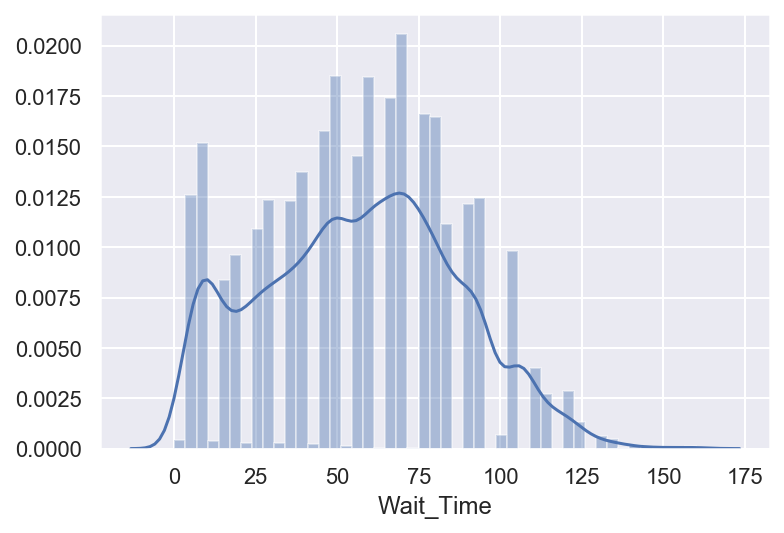

In [11]:
sns.distplot(df['Wait_Time'])

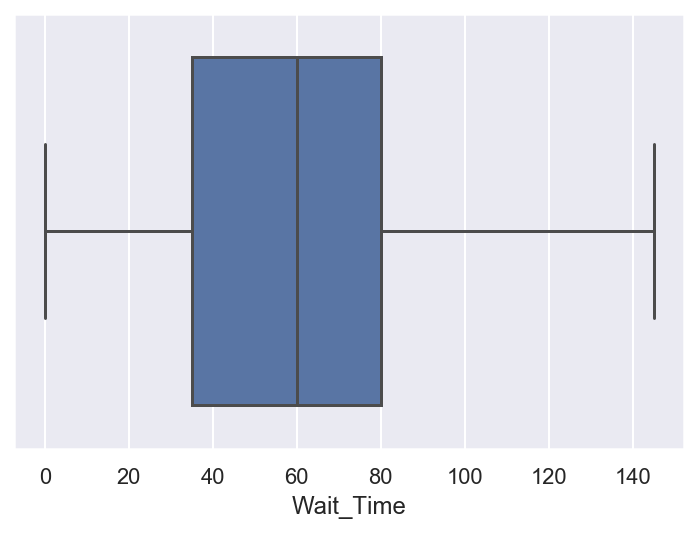

In [12]:
sns.boxplot(smaller_df['Wait_Time'])

In [13]:
X = smaller_df.loc[:,['Temp_(F)','Dew_Point_(F)','Humidity_(%)','Wind_Speed_(mph)',
                      'Wind_Gust_(mph)','Pressure_(in)','Precip_(in)','Day_of_the_Week_Friday',
                      'Day_of_the_Week_Monday','Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
                      'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
                      'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
                      'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
                      'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
                      'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
                      'Month_6', 'Month_7', 'Month_8']]

y = smaller_df['Wait_Time']

In [14]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    train_score=lr_model.score(X_train, y_train)
    
    # score fit model on validation data
    test_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Test R^2 score was:', test_score)
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print('\nIntercept: ',lr_model.intercept_)
    
    pred = lr_model.predict(X_test) 
  
    MAE = metrics.mean_absolute_error(y_test,pred)
    MSE = metrics.mean_squared_error(y_test,pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
    print('\nMAE: ',MAE) 
    print('MSE: ',MSE) 
    print('RMSE: ',RMSE)
    
    sns.distplot((y_test-pred))

    
    plt.scatter(pred,y_test,alpha=0.2,color='#EE0022')
    plt.xlabel('Predicted Wait Time')
    plt.ylabel('Actual Wait Time')
    plt.xlim(0,120)
    plt.ylim(0,180)
    plt.grid(False_)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred = lr_model.predict(X_test) 

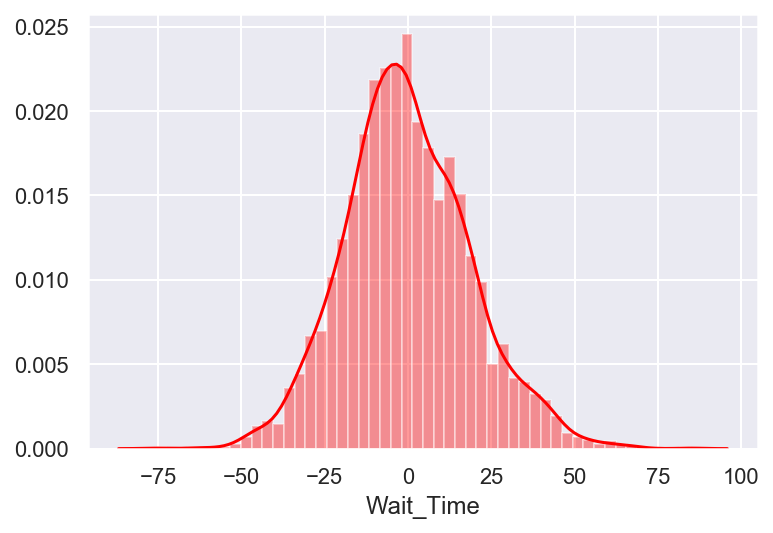

In [18]:
sns.distplot((y_test-pred), color='red')


Train R^2 score was: 0.6141815208664714
Test R^2 score was: 0.5988183761063912

Feature coefficient results: 

Temp_(F) : 0.10
Dew_Point_(F) : 1.29
Humidity_(%) : -0.53
Wind_Speed_(mph) : -0.08
Wind_Gust_(mph) : 0.12
Pressure_(in) : -0.14
Precip_(in) : -1.62
Day_of_the_Week_Friday : -2.22
Day_of_the_Week_Monday : 2.78
Day_of_the_Week_Saturday : -3.68
Day_of_the_Week_Sunday : -8.95
Day_of_the_Week_Thursday : 2.66
Day_of_the_Week_Tuesday : 1.20
Day_of_the_Week_Wednesday : 8.21
Hour_0 : -29.46
Hour_1 : -40.48
Hour_2 : 0.00
Hour_6 : 0.00
Hour_7 : -30.93
Hour_8 : -36.64
Hour_9 : -26.37
Hour_10 : -1.46
Hour_11 : 14.50
Hour_12 : 25.55
Hour_13 : 29.04
Hour_14 : 24.82
Hour_15 : 18.73
Hour_16 : 25.56
Hour_17 : 21.99
Hour_18 : 21.25
Hour_19 : 17.33
Hour_20 : 9.58
Hour_21 : -13.95
Hour_22 : -12.55
Hour_23 : -16.51
Month_5 : -5.36
Month_6 : 12.01
Month_7 : 2.36
Month_8 : -9.01

Intercept:  -11.50860317619155

MAE:  14.764790610142777
MSE:  354.0356310247786
RMSE:  18.81583458220173


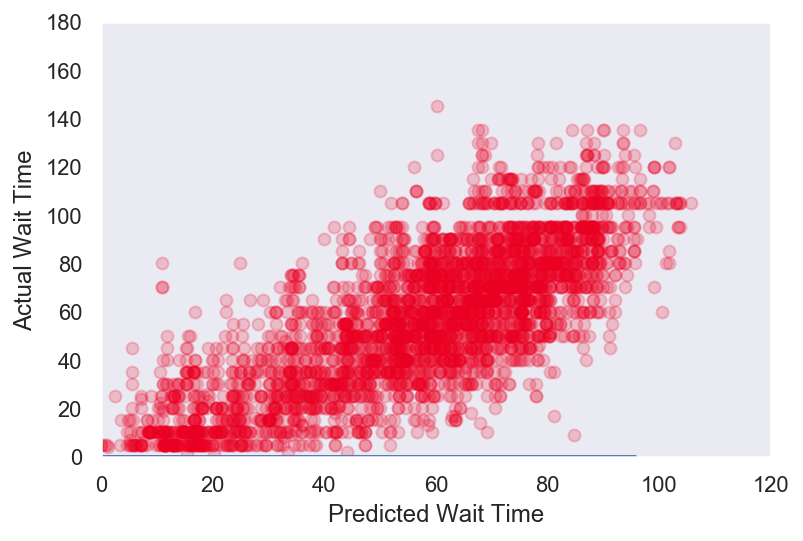

In [19]:
split_and_validate(X, y)

In [20]:
wait_model = sm.OLS(y, X, data=smaller_df) 
results = wait_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Wait_Time   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     844.3
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:16:28   Log-Likelihood:                -79357.
No. Observations:               18289   AIC:                         1.588e+05
Df Residuals:                   18254   BIC:                         1.591e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temp_(F)                     -0.0275      0.195     -0.141      0.888      -0.410       0.355
Dew_Point_(F)                 1.3815      0.183      7.545      0.000       1.023       1.740
Humidity_(%)                 -0.5697      0.082     -6.971      0.000      -0.730      -0.409
Wind_Speed_(mph)             -0.0835      0.038     -2.217      0.027      -0.157      -0.010
Wind_Gust_(mph)               0.1199      0.022      5.483      0.000       0.077       0.163
Pressure_(in)                -0.1526      0.167     -0.915      0.360      -0.479       0.174
Precip_(in)                  -2.6880      1.351     -1.990      0.047      -5.335      -0.041
Day_of_the_Week_Friday       -3.7561      3.648     -1.030      0.303     -10.907       3.395
Day_of_the_Week_Monday        1.1683      3.669      0.318      0.750      -6.023       8.360
Day_of_the_Week_Saturday     -5.3276      3.665     -1.454      0.146     -12.512       1.857
Day_of_the_Week_Sunday      -10.4668      3.668     -2.854      0.004     -17.656      -3.278
Day_of_the_Week_Thursday      1.1508      3.659      0.315      0.753      -6.020       8.322
Day_of_the_Week_Tuesday      -0.4571      3.629     -0.126      0.900      -7.570       6.656
Day_of_the_Week_Wednesday     6.6986      3.659      1.831      0.067      -0.473      13.870
Hour_0                      -30.5299      3.784     -8.068      0.000     -37.947     -23.113
Hour_1                      -40.9186     17.757     -2.304      0.021     -75.724      -6.113
Hour_2                      6.84e-14   2.23e-14      3.062      0.002    2.46e-14    1.12e-13
Hour_6                    -2.118e-14   3.83e-15     -5.524      0.000   -2.87e-14   -1.37e-14
Hour_7                      -35.7673      5.592     -6.396      0.000     -46.728     -24.807
Hour_8                      -36.9347      1.938    -19.061      0.000     -40.733     -33.137
Hour_9                      -27.1990      1.680    -16.194      0.000     -30.491     -23.907
Hour_10                      -1.7320      1.681     -1.030      0.303      -5.027       1.563
Hour_11                      14.4879      1.712      8.465      0.000      11.133      17.843
Hour_12                      25.2962      1.730     14.623      0.000      21.905      28.687
Hour_13                      29.2010      1.736     16.816      0.000      25.797      32.605
Hour_14                      24.5559      1.746     14.067      0.000      21.134      27.978
Hour_15                      18.5272      1.719     10.776      0.000      15.157      21.897
Hour_16                      25.0815      1.715     14.621      0.000      21.719      28.444
Hour_17                      22.2854      1.684     13.236      0.000      18.985      25.586
Hour_18                      20.6832      1.673     12.360      0.000      